**Imbalance treatment**

Using creditcard dataset held on Kaggle kernel. Showing the use of Oversampling Synthetic data (SMOTE) against Undersampling the majority class (NearMiss)

In [1]:
import pandas  as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score 
  
# load the data set 
data = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv') 
  
# print info about columns in the dataframe 
print(data.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [2]:
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [3]:
# normalise the amount column 
data['normAmount'] = StandardScaler().fit_transform(np.array(data['Amount']).reshape(-1, 1)) 

# drop Time and Amount columns as they are not relevant for prediction purpose 
data = data.drop(['Time', 'Amount'], axis = 1) 

# as you can see there are 492 fraud transactions. 
data['Class'].value_counts() 

0    284315
1       492
Name: Class, dtype: int64

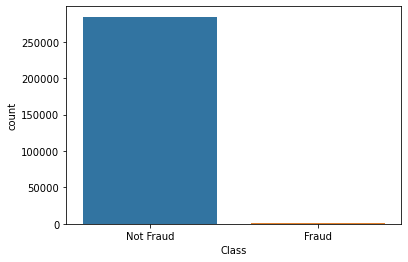

In [4]:
import seaborn as sns
# visualize the target variable
g = sns.countplot(data['Class'])
g.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

In [5]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class', 'normAmount'],
      dtype='object')

In [6]:
X = data[['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28','normAmount']]
y = data['Class']

# **Without any balancing**

In [18]:
from sklearn.model_selection import train_test_split 

# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (199364, 29)
Number transactions y_train dataset:  (199364,)
Number transactions X_test dataset:  (85443, 29)
Number transactions y_test dataset:  (85443,)


## Metrics
## Recall is the number of frauds model found correctly over the number of fraud in the whole dataset
## Precision is the number of frauds found correctly over the number of frauds model found 

In [22]:
#Train model without handling imbalanced class distribution

# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 
print(roc_auc_score(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

0.8094534662486266


accuracy of 100% but the minority class has 62% recall.  Low recall indicates a high number of false negatives

# **Random undersampling**

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out. RandomUnderSampler is a fast and easy way to balance the data by randomly selecting a subset of data for the targeted classes. Under-sample the majority class(es) by randomly picking samples with or without replacement

In [9]:
# import library
from imblearn.under_sampling import RandomUnderSampler

print("Before Random Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Random Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_rus, y_rus = rus.fit_resample(X, y)

print('After Random Undersampling, counts of label 1:', (y_rus.shape))
print('After Random Undersampling, counts of label 0:', (X_rus.shape))

Before Random Undersampling, counts of label '1': 345
Before Random Undersampling, counts of label '0': 199019 

After Random Undersampling, counts of label 1: (984,)
After Random Undersampling, counts of label 0: (984, 29)


In [10]:
# train the model on train set 
lr3 = LogisticRegression() 
lr3.fit(X_rus, y_rus.ravel()) 
predictions = lr3.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 
print(roc_auc_score(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      0.96      0.98     85296
           1       0.04      0.93      0.08       147

    accuracy                           0.96     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.96      0.98     85443

0.9449757674594881


- Low precision indicates a high number of false positives.

# Random Oversampling

Generate new samples in the minority classes. The most naive strategy is to generate new samples by randomly sampling with replacement of the currently available samples. Oversampling can be defined as adding more copies to the minority class. Oversampling can be a good choice when you don’t have a ton of data to work with.

 -Can cause overfitting and poor generalization to test data

In [11]:
# import library
from imblearn.over_sampling import RandomOverSampler

print("Before Random Oversampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Random Oversampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

ros = RandomOverSampler(random_state=42)

# fit predictor and target varaible
X_ros, y_ros = ros.fit_resample(X, y)

print('Resample dataset shape label 1', (y_ros.shape))
print('Resample dataset shape label 0', (X_ros.shape))

Before Random Oversampling, counts of label '1': 345
Before Random Oversampling, counts of label '0': 199019 

Resample dataset shape label 1 (568630,)
Resample dataset shape label 0 (568630, 29)


In [12]:
# train the model on train set 
lr4 = LogisticRegression() 
lr4.fit(X_ros, y_ros.ravel()) 
predictions = lr4.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 
print(roc_auc_score(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.07      0.92      0.12       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.56     85443
weighted avg       1.00      0.98      0.99     85443

0.9479111636213292


- Low precision indicates a high number of false positives.

# **NearMiss Algorithm**

Undersampled the majority instances and made it equal to majority class. The same number of majority as minority

In [13]:

print("Before Near miss, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Near miss, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 
  
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train.ravel()) 
  
print('After Near miss, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Near miss, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Near miss, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Near miss, counts of label '0': {}".format(sum(y_train_miss == 0))) 


Before Near miss, counts of label '1': 345
Before Near miss, counts of label '0': 199019 

After Near miss, the shape of train_X: (690, 29)
After Near miss, the shape of train_y: (690,) 

After Near miss, counts of label '1': 345
After Near miss, counts of label '0': 345


In [14]:
# train the model on train set 
lr2 = LogisticRegression() 
lr2.fit(X_train_miss, y_train_miss.ravel()) 
predictions = lr2.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 
print(roc_auc_score(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      0.55      0.71     85296
           1       0.00      0.95      0.01       147

    accuracy                           0.56     85443
   macro avg       0.50      0.75      0.36     85443
weighted avg       1.00      0.56      0.71     85443

0.7534836669614384


- Low precision indicates a high number of false positives.

> 

# **SMOTE**

Oversampling of the minority with synthetic data

In [15]:
print("Before SMOTE, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before SMOTE, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) #k_neighbors (default=5)

X_smote_train, y_smote_train = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After SMOTE, the shape of train_X: {}'.format(X_smote_train.shape)) 
print('After SMOTE, the shape of train_y: {} \n'.format(y_smote_train.shape)) 
  
print("After SMOTE, counts of label '1': {}".format(sum(y_smote_train == 1))) 
print("After SMOTE, counts of label '0': {}".format(sum(y_smote_train == 0))) 


Before SMOTE, counts of label '1': 345
Before SMOTE, counts of label '0': 199019 

After SMOTE, the shape of train_X: (398038, 29)
After SMOTE, the shape of train_y: (398038,) 

After SMOTE, counts of label '1': 199019
After SMOTE, counts of label '0': 199019


In [16]:
lr1 = LogisticRegression() 
lr1.fit(X_smote_train, y_smote_train.ravel()) 
predictions = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 
print(roc_auc_score(y_test, predictions))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443

0.9468618764331843


- Low precision indicates a high number of false positives

# **Tomek links**

Tomek links are pairs of very close instances of opposite classes. Removing these instances, increases the margin of the classification. 

Tomek links exist if two samples are the nearest neighbours of each **other

In [17]:
# load library
from imblearn.under_sampling import TomekLinks

print("Before Random Oversampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Random Oversampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

tl = TomekLinks(sampling_strategy='majority')

# fit predictor and target variable
X_tl, y_tl = tl.fit_sample(X, y)

print('Resample dataset shape label 1 ', (y_tl.shape))
print('Resample dataset shape label 0 ', (X_tl.shape))

Before Random Oversampling, counts of label '1': 345
Before Random Oversampling, counts of label '0': 199019 



KeyboardInterrupt: 

In [ ]:
# train the model on train set 
lr5 = LogisticRegression() 
lr5.fit(X_tl, y_tl.ravel()) 
predictions = lr5.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions)) 

**note the higher precision but lower recall**

# **Use Penalize Algorithms**

This can increase the cost of classification mistake on minority class. For svm, use 'class_weight = 'balanced'

In [ ]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(X_test)

print(classification_report(y_test, svc_predict)) 
print(roc_auc_score(y_test, svc_predict))

# **Tree based**

Decision trees frequently perform well on imbalanced data. In modern machine learning, tree ensembles (Random Forests, Gradient Boosted Trees, etc.)

In [ ]:
# load library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(X_train, y_train)

# predict
rfc_predict = rfc.predict(X_test)

print(classification_report(y_test, rfc_predict)) 
print(roc_auc_score(y_test, rfc_predict))